In [3]:
# Kmeans Clustering algorithm
# 1. Select K data points at random to be centroids
# 2. Assign each point to its closest centroid
# 3. Re-compute centroids (mean of each cluster)
# Repeat steps 2-3 until clusters are stable

# some things we'll need...
# read_json(), json_noramlize(), np.select(), df.sample()

In [4]:
import pandas as pd
import json
import numpy as np
import scipy.spatial.distance as ssd
import matplotlib.pyplot as plt

In [5]:
# read in JSON file to a dataframe
df = pd.read_json("aliens.json")
df.head()

,results
0,"{'name': 'stitch', 'slimy': 1, 'kill humans': ..."
1,"{'name': 'E.T.', 'slimy': 2, 'kill humans': 1,..."
2,"{'name': 'Harvester', 'slimy': 9, 'kill humans..."
3,"{'name': 'kang', 'slimy': 10, 'kill humans': 8..."
4,"{'name': 'kodos', 'slimy': 10, 'kill humans': ..."


In [6]:
# normalize json data to be a more reasonable dataframe
df = pd.json_normalize(df["results"])
df.head()

,name,slimy,kill humans,catchphrase
0,stitch,1.0,2.0,ohana means family family means no one is left...
1,E.T.,2.0,1.0,E.T. phone home!
2,Harvester,9.0,10.0,I would like to conquer your planet
3,kang,10.0,8.0,Go ahead! Throw your vote away!
4,kodos,10.0,7.0,"Eat, Simpsons! Grow large with food!"


<Axes: xlabel='slimy', ylabel='kill humans'>

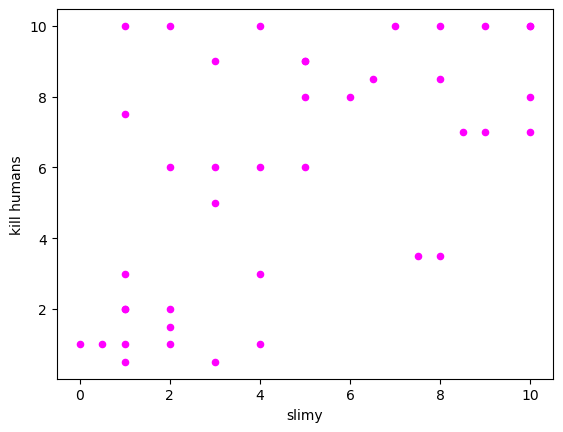

In [7]:
# plot the features (no labels!)
df.plot(kind = "scatter", x = "slimy", y = "kill humans", color = "magenta")

In [8]:
# select K centroids at random
K = 3
centroids = df.sample(K)[["slimy", "kill humans"]]
centroids = [(df.iloc[i]["slimy"], df.iloc[i]["kill humans"]) for i in range(len(centroids))]
centroids
             

[(1.0, 2.0), (2.0, 1.0), (9.0, 10.0)]

In [38]:
# Assign each point to its closest centroid
def assign_centroids(df, centroids, x = "slimy", y = "kill humans"):
    centroid_assignments = []
    
    for i in range(len(df)):
        curr_point = df.iloc[i][["slimy", "kill humans"]]
        min_dist = float("inf")
        min_centroid = -1
        
        for j in range(len(centroids)):
            curr_centroid = centroids[j]
            dist = ssd.euclidean(curr_point, curr_centroid)
            if dist < min_dist: 
                min_dist = dist
                min_centroid = j
        centroid_assignments.append(min_centroid)
    
    return centroid_assignments

In [10]:
# at this point, centoirds are still the randomly-chosen ones
# assign each point to its closest centroid
centroid_assignments = assign_centroids(df, centroids)

In [11]:
# put centroid assignments into my dataframe
df["cluster"] = centroid_assignments
df.head(10)

,name,slimy,kill humans,catchphrase,cluster
0,stitch,1.0,2.0,ohana means family family means no one is left...,0
1,E.T.,2.0,1.0,E.T. phone home!,1
2,Harvester,9.0,10.0,I would like to conquer your planet,2
3,kang,10.0,8.0,Go ahead! Throw your vote away!,2
4,kodos,10.0,7.0,"Eat, Simpsons! Grow large with food!",2
5,Audrey II,5.0,9.0,I'm just a mean green mother from outer space ...,2
6,Marvin,3.0,6.0,Where's the kaboom? There was supposed to be a...,0
7,Rocky,1.0,1.0,"Hey, your face is leaking! I haven't seen that...",0
8,Barsoomus invadus,5.0,8.0,Don't run! We are your friends!,2
9,Queller,7.5,3.5,grrr! argh!,1


<Axes: xlabel='slimy', ylabel='kill humans'>

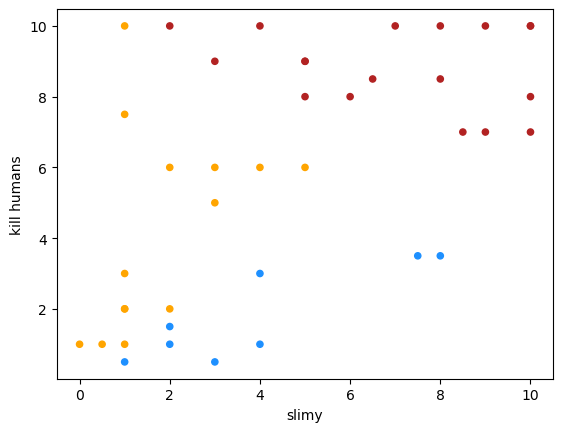

In [12]:
# plot the points with their clusters
# np.select(list of conditions, list of results)
df["color"] = np.select([df["cluster"] == 0, df["cluster"] == 1, df["cluster"] == 2],
                        ["orange", "dodgerblue", "firebrick"])
df.plot(kind = "scatter", x = "slimy", y = "kill humans", c = "color")

In [13]:
def compute_centroids(df, k):
    ''' given a value of k (number of clusters) and a datafram
        which includes columns for centroid, x, and y,
        compute the average (x, y) values for every point that
        belongs to a given centroid.
        Returns a list of tuples, the average (x, y) for each centroid
    '''
    centroids = []
    for i in range(k):
        curr_cluster = df[df["cluster"] == i]
        avg_x = curr_cluster["slimy"].mean()
        avg_y = curr_cluster["kill humans"].mean()
        centroids.append((avg_x, avg_y))
    return centroids

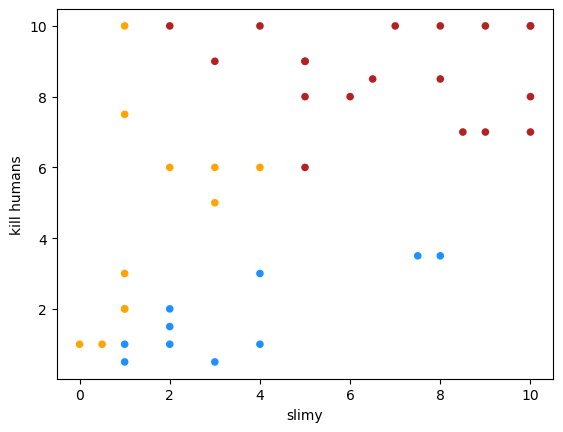

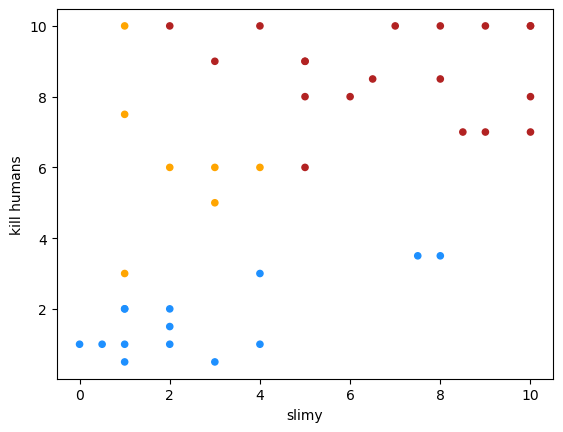

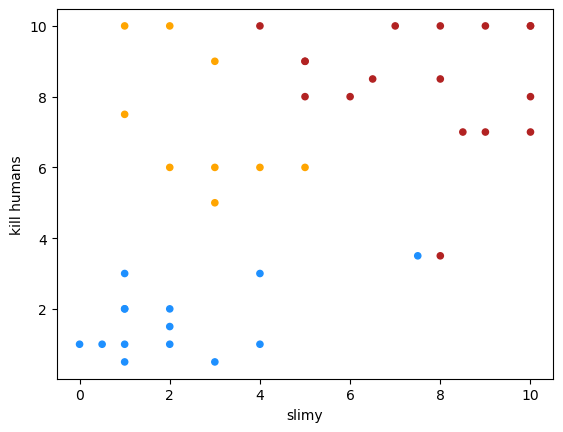

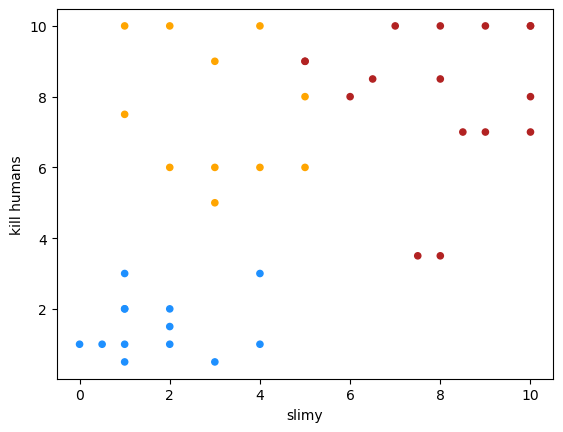

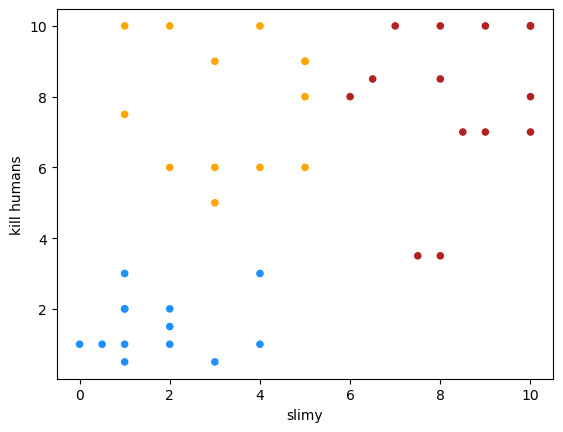

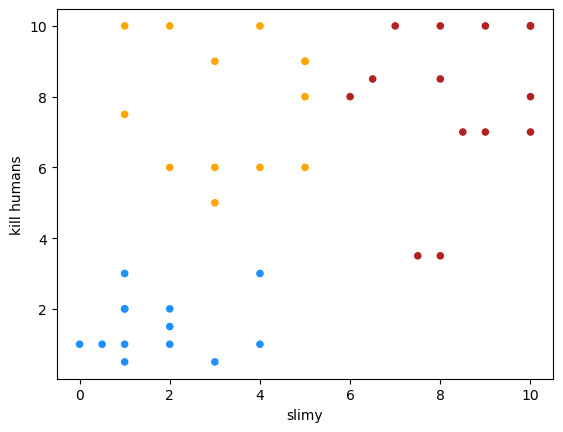

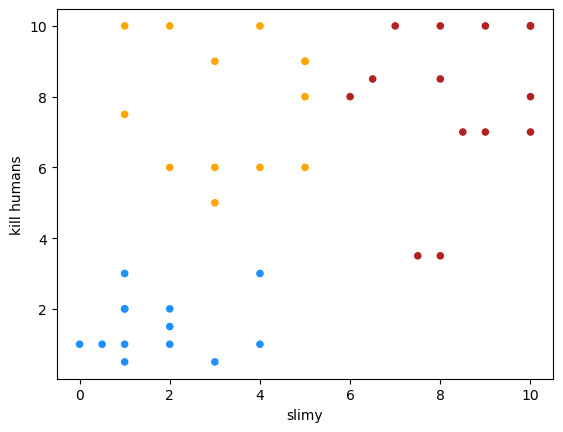

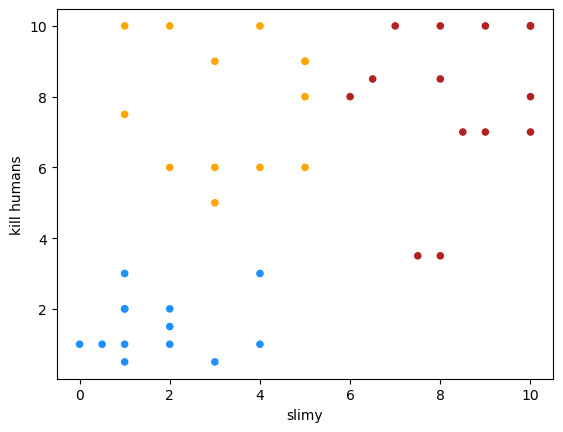

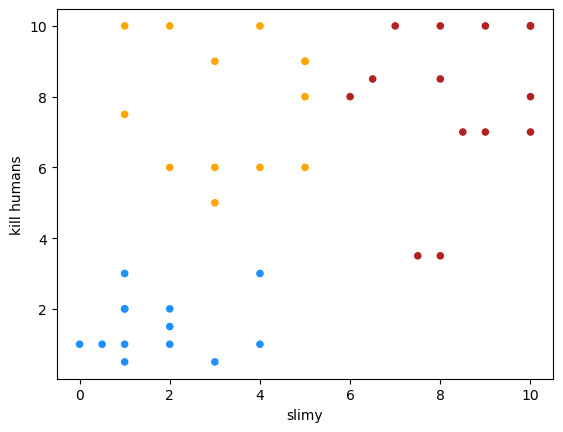

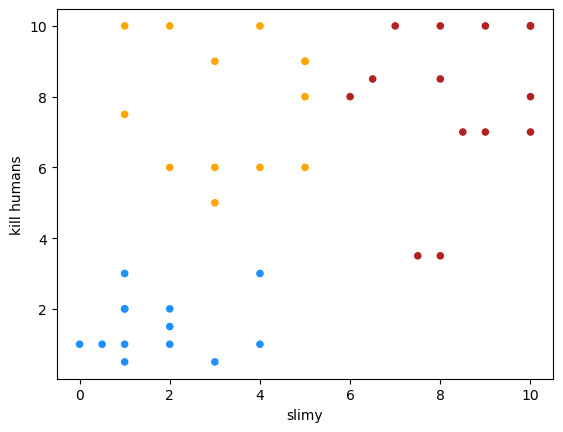

In [14]:
for i in range(10):
    centroids = compute_centroids(df, K)
    centroid_assignments = assign_centroids(df, centroids)
    df["cluster"] = centroid_assignments
    df["color"] = np.select([df["cluster"] == 0, df["cluster"] == 1, df["cluster"] == 2],
                        ["orange", "dodgerblue", "firebrick"])
    df.plot(kind = "scatter", x = "slimy", y = "kill humans", c = "color")
    plt.show()

In [15]:
#today(fri) clustering...
#tf.idf on the alien catchphrases:
#apply tf.idf
#apply PCA

In [16]:
#whats in our dataframe?
df.head()

,name,slimy,kill humans,catchphrase,cluster,color
0,stitch,1.0,2.0,ohana means family family means no one is left...,1,dodgerblue
1,E.T.,2.0,1.0,E.T. phone home!,1,dodgerblue
2,Harvester,9.0,10.0,I would like to conquer your planet,2,firebrick
3,kang,10.0,8.0,Go ahead! Throw your vote away!,2,firebrick
4,kodos,10.0,7.0,"Eat, Simpsons! Grow large with food!",2,firebrick


In [19]:
#drop unnecessary columns
df.drop(columns = ["cluster", "color"])
df.head()

,name,slimy,kill humans,catchphrase,cluster,color
0,stitch,1.0,2.0,ohana means family family means no one is left...,1,dodgerblue
1,E.T.,2.0,1.0,E.T. phone home!,1,dodgerblue
2,Harvester,9.0,10.0,I would like to conquer your planet,2,firebrick
3,kang,10.0,8.0,Go ahead! Throw your vote away!,2,firebrick
4,kodos,10.0,7.0,"Eat, Simpsons! Grow large with food!",2,firebrick


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

In [23]:
#tf.idf on the catchphrases
vectorizer = TfidfVectorizer(stop_words = "english")
vectorized_catchphrases = vectorizer.fit_transform(df["catchphrase"])
vectorized_catchphrases

<40x121 sparse matrix of type '<class 'numpy.float64'>'
	with 137 stored elements in Compressed Sparse Row format>

In [25]:
#make the vectorized scores more dense so we can see them
vect_df = pd.DataFrame(vectorized_catchphrases.todense(), columns = vectorizer.get_feature_names_out())
vect_df.head()

,ahead,alien,argh,arrives,ass,attack,away,ball,balloon,banged,...,tomorrow,took,truth,vote,want,wants,wife,world,worry,yes
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.512419,0.0,0.0,0.0,0.0,0.0,0.46074,0.0,0.0,0.0,...,0.0,0.0,0.0,0.512419,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
#we have high dimensionality data, with lots of zeros
#PCA might help
pca = PCA(n_components = 2)
reduced_data = pca.fit_transform(vectorized_catchphrases.toarray())

In [29]:
#throw the reduced data inot our initial df
df[["pca1","pca2"]] = reduced_data
df.head()

,name,slimy,kill humans,catchphrase,cluster,color,pca1,pca2
0,stitch,1.0,2.0,ohana means family family means no one is left...,1,dodgerblue,-0.004005,0.003895
1,E.T.,2.0,1.0,E.T. phone home!,1,dodgerblue,-0.008690,0.008757
2,Harvester,9.0,10.0,I would like to conquer your planet,2,firebrick,-0.005983,0.005906
3,kang,10.0,8.0,Go ahead! Throw your vote away!,2,firebrick,-0.055602,-0.076684
4,kodos,10.0,7.0,"Eat, Simpsons! Grow large with food!",2,firebrick,-0.004005,0.003895


In [35]:
#pick K centroids at random
centroids = df.sample(K)[["pca1","pca2"]]
centroids = [(df.iloc[i]["pca1"],df.iloc[i]["pca2"]) for i in range(len(centroids))]
centroids

[(-0.004004996037528304, 0.003895353013523199),
 (-0.008690097562060024, 0.00875682811480255),
 (-0.005983260454166049, 0.005906217145171779)]

In [39]:
#assign every data ppoint ot its closest centroid
centroid_assignments = assign_centroids(df, centroids, x = "pca1", y = "pca2")

<function matplotlib.pyplot.show(close=None, block=None)>

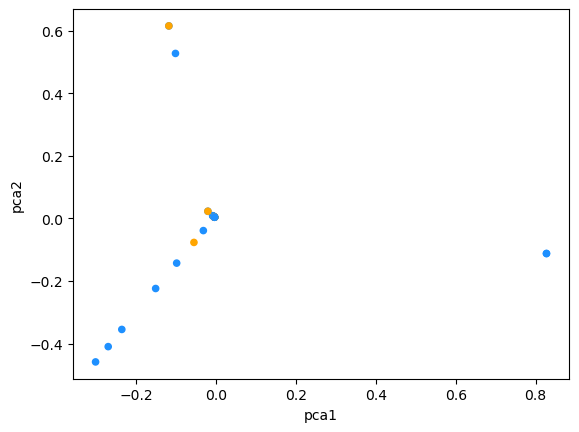

In [44]:
#put the centroid assignmetnts back into the df
df["cluster"] = centroid_assignments
df["color"] = np.select([df["cluster"] == 0, df["cluster"] == 1, df["cluster"] == 2],
                        ["orange", "dodgerblue", "firebrick"])
df.plot(kind = "scatter", x = "pca1", y = "pca2", c = "color")
plt.show